# 1. Diabetes 

## (1) 라이브러리 import



In [197]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

## (2) 데이터 확인 

In [198]:
diabetes_data = load_diabetes()

In [199]:
dir(diabetes_data)

['DESCR',
 'data',
 'data_filename',
 'data_module',
 'feature_names',
 'frame',
 'target',
 'target_filename']

In [200]:
df_X = diabetes_data['data']
df_y = diabetes_data['target']
df_X.shape, df_y.shape

((442, 10), (442,))

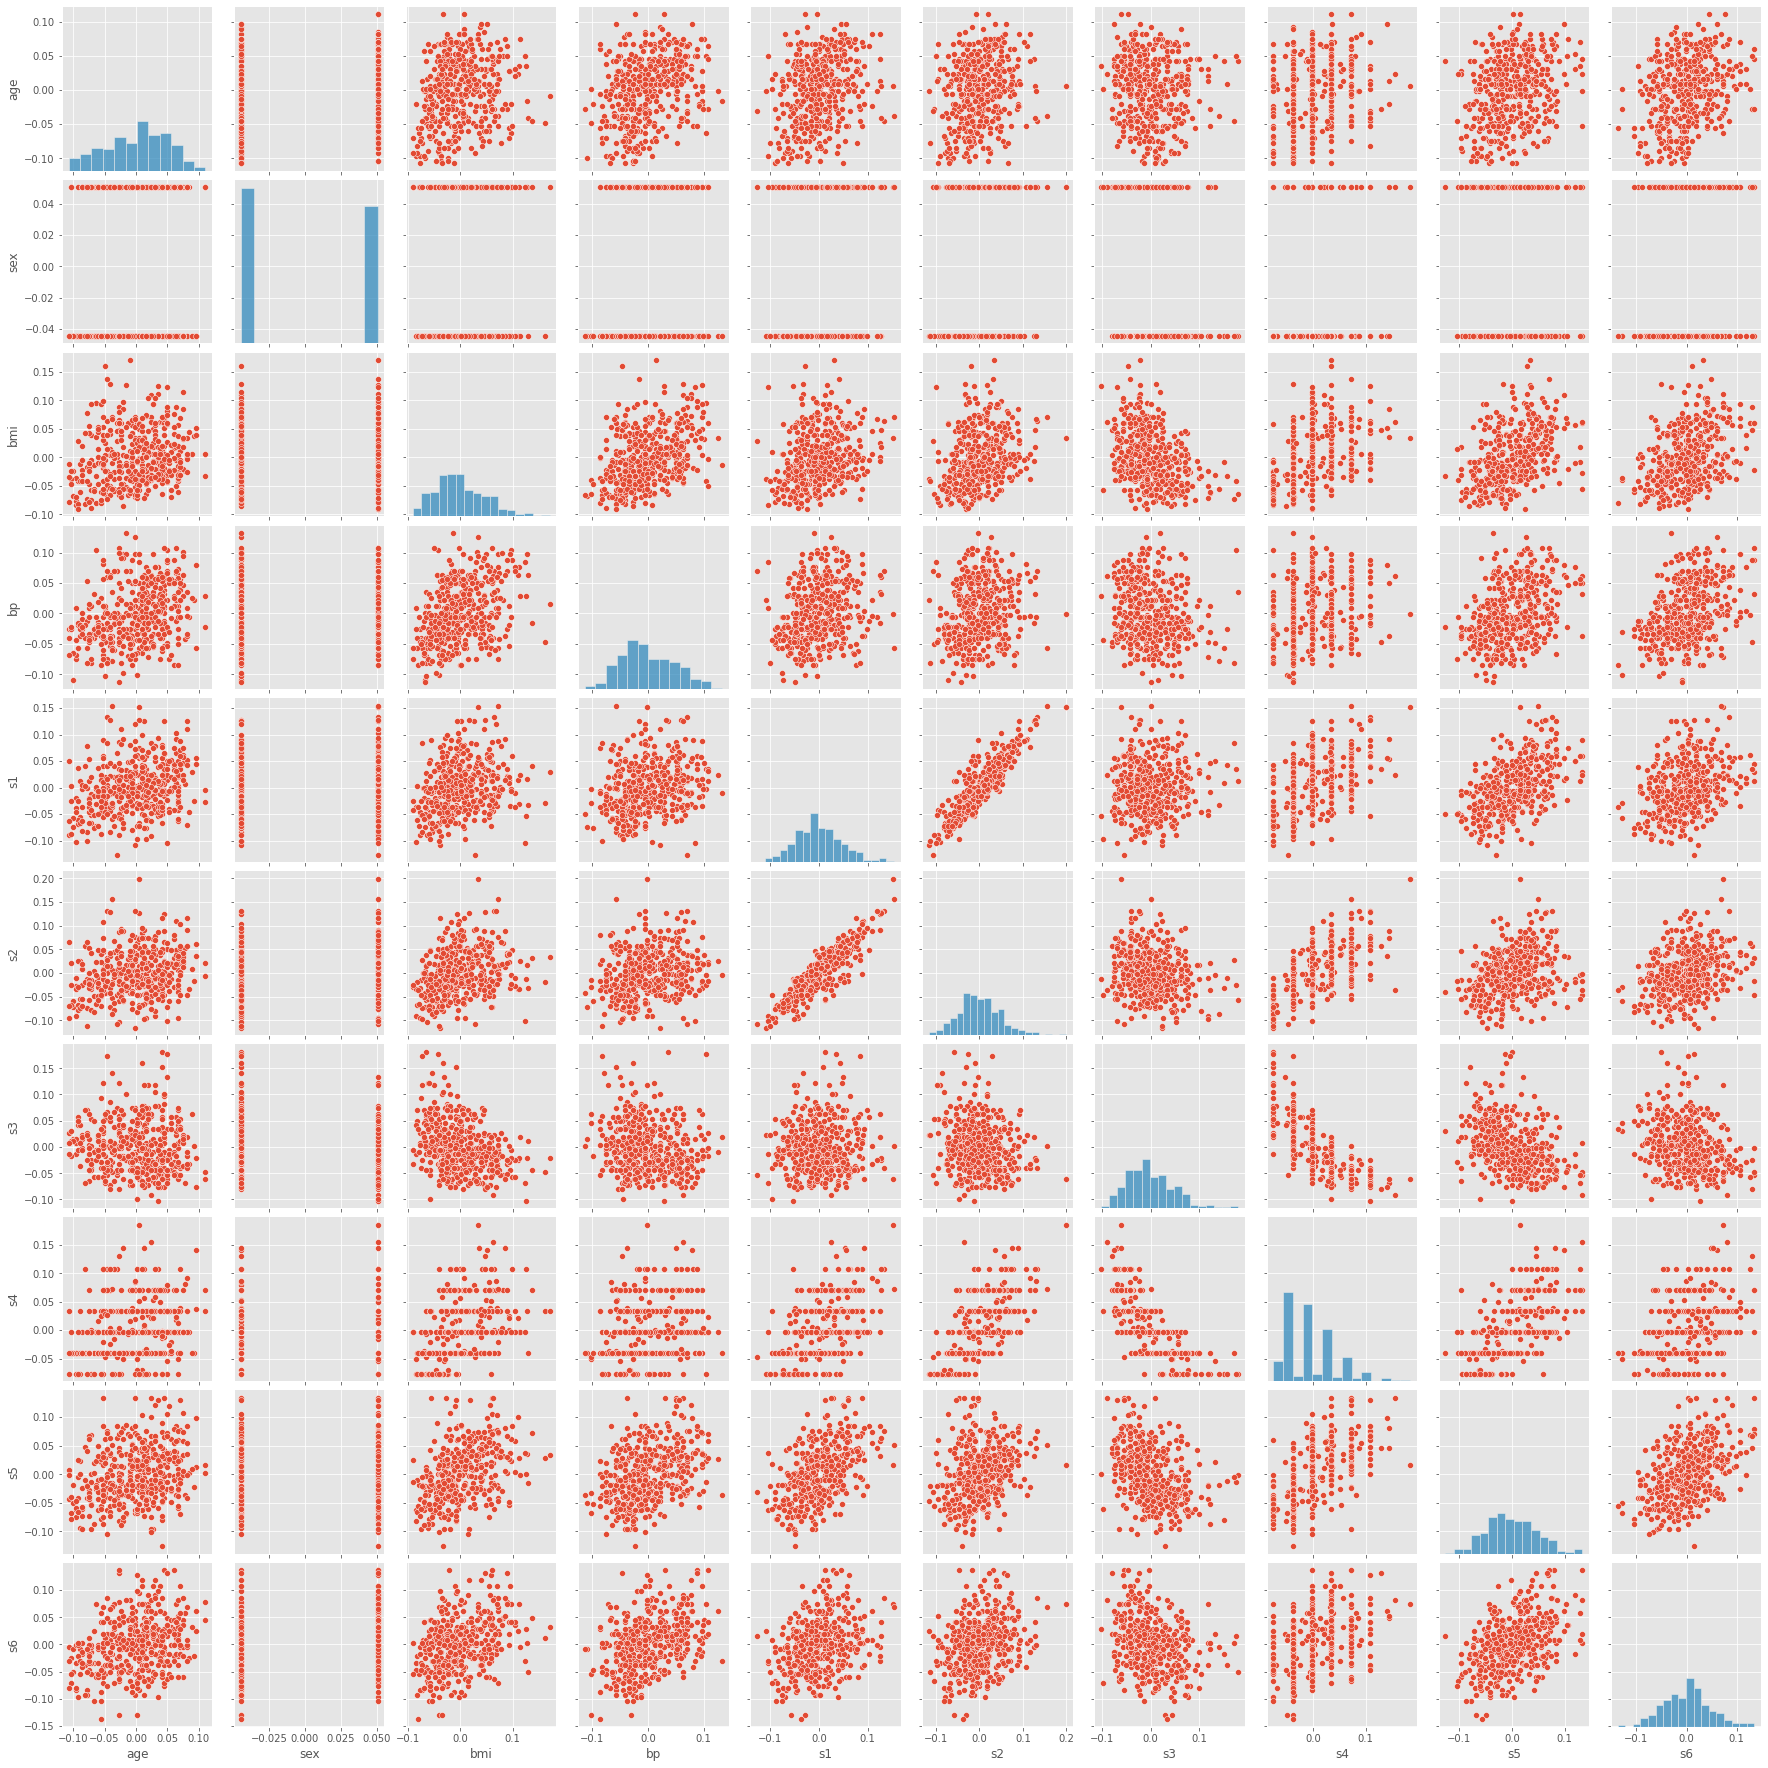

In [201]:
df = pd.DataFrame(df_X, columns=diabetes_data['feature_names'])
sns.pairplot(df)

## (3) 데이터 준비하기


In [202]:
df_X = np.array(df_X)
df_y = np.array(df_y)

In [203]:
train_X, test_X, train_y, test_y = train_test_split(df_X, df_y, test_size = 0.2, random_state=94)

In [204]:
print(train_X.shape, train_y.shape)
print(test_X.shape, test_y.shape)

(353, 10) (353,)
(89, 10) (89,)


## (4) 모델 준비

- W, b 초기화 
- 모델 정의 
- loss 정의 = > MSE 함수로 정의 
- Gradient 함수 구현 

In [205]:
_, l = train_X.shape
W = np.random.rand(l)
b = np.random.rand()
W, b

(array([0.45897404, 0.07071308, 0.19383086, 0.6616165 , 0.67370914,
        0.55239528, 0.13978654, 0.47879346, 0.12230487, 0.89362323]),
 0.8031354005601793)

In [206]:
def model(X, W, b) :
    predictions = 0
#     for i in range(l):
#         predictions += X[:, i] * W[i]
#     predictions += b
    predictions = np.sum([X[:, i] * W[i] for i in range(l)], axis=0) + b
    
    return predictions

In [207]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

In [208]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

In [209]:
def gradient(X, W, b, y) :
    N = len(X)
    
    y_pred = model(X, W, b)
    
    dW = 1/N * 2 * X.T.dot(y_pred-y)
    db = 2 * (y_pred-y).mean()
    
    return dW, db

In [210]:
dW, db = gradient(df_X, W, b, df_y)
print("dW:", dW)
print("db:", db)

dW: [-1.36999033 -0.31210609 -4.28971644 -3.22656623 -1.54359192 -1.26586844
  2.88829708 -3.14462254 -4.13735847 -2.79295948]
db: -302.66069752467155


## (5) 학습
- Learning Rate는 0.1으로 설정.
- Iteration횟수는 충분히 많이 준다.
- MSE의 값이 3000 이하의 점수가 나올 때, 10번정도 checks 리스트에 저장을 한 후, 반복문을 종료한다.
- 이후 checks 리스트를 iteration 횟수와 함께 MSE 값을 출력해준다.

In [211]:
LEARNING_RATE = 0.1

In [212]:
losses = []
checks = []

for i in range(1, 100001):
    dW, db = gradient(train_X, W, b, train_y)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(df_X, W, b, df_y)
    losses.append(L)
    if i%10 == 0 :
        print('Iteration %d : Loss %0.4f' % (i, L))
    if L <= 3000 :
        checks.append((i, L))
        if len(checks) == 10:
            break

Iteration 10 : Loss 6083.3492
Iteration 20 : Loss 5767.5866
Iteration 30 : Loss 5695.6135
Iteration 40 : Loss 5626.9553
Iteration 50 : Loss 5560.3366
Iteration 60 : Loss 5495.8282
Iteration 70 : Loss 5433.3732
Iteration 80 : Loss 5372.9010
Iteration 90 : Loss 5314.3420
Iteration 100 : Loss 5257.6287
Iteration 110 : Loss 5202.6963
Iteration 120 : Loss 5149.4823
Iteration 130 : Loss 5097.9265
Iteration 140 : Loss 5047.9707
Iteration 150 : Loss 4999.5591
Iteration 160 : Loss 4952.6376
Iteration 170 : Loss 4907.1545
Iteration 180 : Loss 4863.0595
Iteration 190 : Loss 4820.3045
Iteration 200 : Loss 4778.8429
Iteration 210 : Loss 4738.6300
Iteration 220 : Loss 4699.6225
Iteration 230 : Loss 4661.7789
Iteration 240 : Loss 4625.0589
Iteration 250 : Loss 4589.4241
Iteration 260 : Loss 4554.8370
Iteration 270 : Loss 4521.2617
Iteration 280 : Loss 4488.6638
Iteration 290 : Loss 4457.0096
Iteration 300 : Loss 4426.2672
Iteration 310 : Loss 4396.4055
Iteration 320 : Loss 4367.3946
Iteration 330 : L

In [213]:
print("MSE 3000이하\n"+'-'*30)
for num, score in checks :
    print("Iteration {} : Loss : {:.4f}".format(num, score))

MSE 3000이하
------------------------------
Iteration 2852 : Loss : 2999.9749
Iteration 2853 : Loss : 2999.8917
Iteration 2854 : Loss : 2999.8087
Iteration 2855 : Loss : 2999.7256
Iteration 2856 : Loss : 2999.6427
Iteration 2857 : Loss : 2999.5598
Iteration 2858 : Loss : 2999.4771
Iteration 2859 : Loss : 2999.3943
Iteration 2860 : Loss : 2999.3117
Iteration 2861 : Loss : 2999.2291


## (6) 결과 예측 및 그래프 그리기 


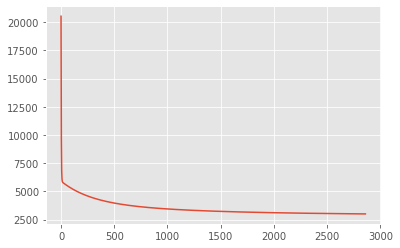

In [214]:
 plt.plot(losses)
plt.show()

In [215]:
prediction = model(test_X, W, b)
mse = loss(test_X, W, b, test_y)
mse

2870.4103985825736

In [216]:
test_X.shape, test_y.shape
type(test_y)

numpy.ndarray

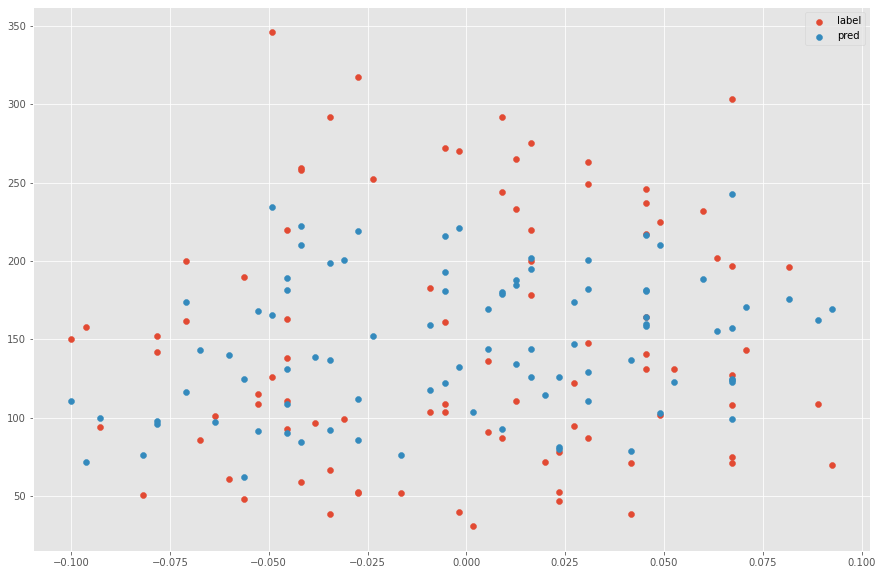

In [217]:
plt.style.use('ggplot')
plt.figure(figsize=(15, 10))
plt.scatter(test_X[:, 0], test_y, label="label")
plt.scatter(test_X[:, 0], prediction, label="pred")
plt.legend()

plt.show()

# 월요일 오후 3시, 자전거 타기 

## (1) import


In [218]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

## (2) 데이터 준비 
- train.csv
- test.csv
- sampleSubmission.csv 
불러오기 


In [219]:
import pandas as pd 
from google.colab import files 
files.upload()

Saving train.csv to train (3).csv
Saving test.csv to test (3).csv
Saving sampleSubmission.csv to sampleSubmission (3).csv


{'sampleSubmission.csv': b'datetime,count\r\n2011-01-20 00:00:00,0\r\n2011-01-20 01:00:00,0\r\n2011-01-20 02:00:00,0\r\n2011-01-20 03:00:00,0\r\n2011-01-20 04:00:00,0\r\n2011-01-20 05:00:00,0\r\n2011-01-20 06:00:00,0\r\n2011-01-20 07:00:00,0\r\n2011-01-20 08:00:00,0\r\n2011-01-20 09:00:00,0\r\n2011-01-20 10:00:00,0\r\n2011-01-20 11:00:00,0\r\n2011-01-20 12:00:00,0\r\n2011-01-20 13:00:00,0\r\n2011-01-20 14:00:00,0\r\n2011-01-20 15:00:00,0\r\n2011-01-20 16:00:00,0\r\n2011-01-20 17:00:00,0\r\n2011-01-20 18:00:00,0\r\n2011-01-20 19:00:00,0\r\n2011-01-20 20:00:00,0\r\n2011-01-20 21:00:00,0\r\n2011-01-20 22:00:00,0\r\n2011-01-20 23:00:00,0\r\n2011-01-21 00:00:00,0\r\n2011-01-21 01:00:00,0\r\n2011-01-21 02:00:00,0\r\n2011-01-21 03:00:00,0\r\n2011-01-21 04:00:00,0\r\n2011-01-21 05:00:00,0\r\n2011-01-21 06:00:00,0\r\n2011-01-21 07:00:00,0\r\n2011-01-21 08:00:00,0\r\n2011-01-21 09:00:00,0\r\n2011-01-21 10:00:00,0\r\n2011-01-21 11:00:00,0\r\n2011-01-21 12:00:00,0\r\n2011-01-21 13:00:00,0\r\n2011-

In [220]:
train = pd.read_csv('train.csv')

train.head()


datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

In [221]:
test = pd.read_csv('test.csv')

test

datetime  season  holiday  workingday  weather   temp  \
0     2011-01-20 00:00:00       1        0           1        1  10.66   
1     2011-01-20 01:00:00       1        0           1        1  10.66   
2     2011-01-20 02:00:00       1        0           1        1  10.66   
3     2011-01-20 03:00:00       1        0           1        1  10.66   
4     2011-01-20 04:00:00       1        0           1        1  10.66   
...                   ...     ...      ...         ...      ...    ...   
6488  2012-12-31 19:00:00       1        0           1        2  10.66   
6489  2012-12-31 20:00:00       1        0           1        2  10.66   
6490  2012-12-31 21:00:00       1        0           1        1  10.66   
6491  2012-12-31 22:00:00       1        0           1        1  10.66   
6492  2012-12-31 23:00:00       1        0           1        1  10.66   

       atemp  humidity  windspeed  
0     11.365        56    26.0027  
1     13.635        56     0.0000  
2     13.635        56     0.0000  
3     12.880        56    11.0014  
4     12.880        56    11.0014  
...      ...       ...        ...  
6488  12.880        60    11.0014  
6489  12.880        60    11.0014  
6490  12.880        60    11.0014  
6491  13.635        56     8.9981  
6492  13.635        65     8.9981  

[6493 rows x 9 columns]

- 데이터 분포 시각화 

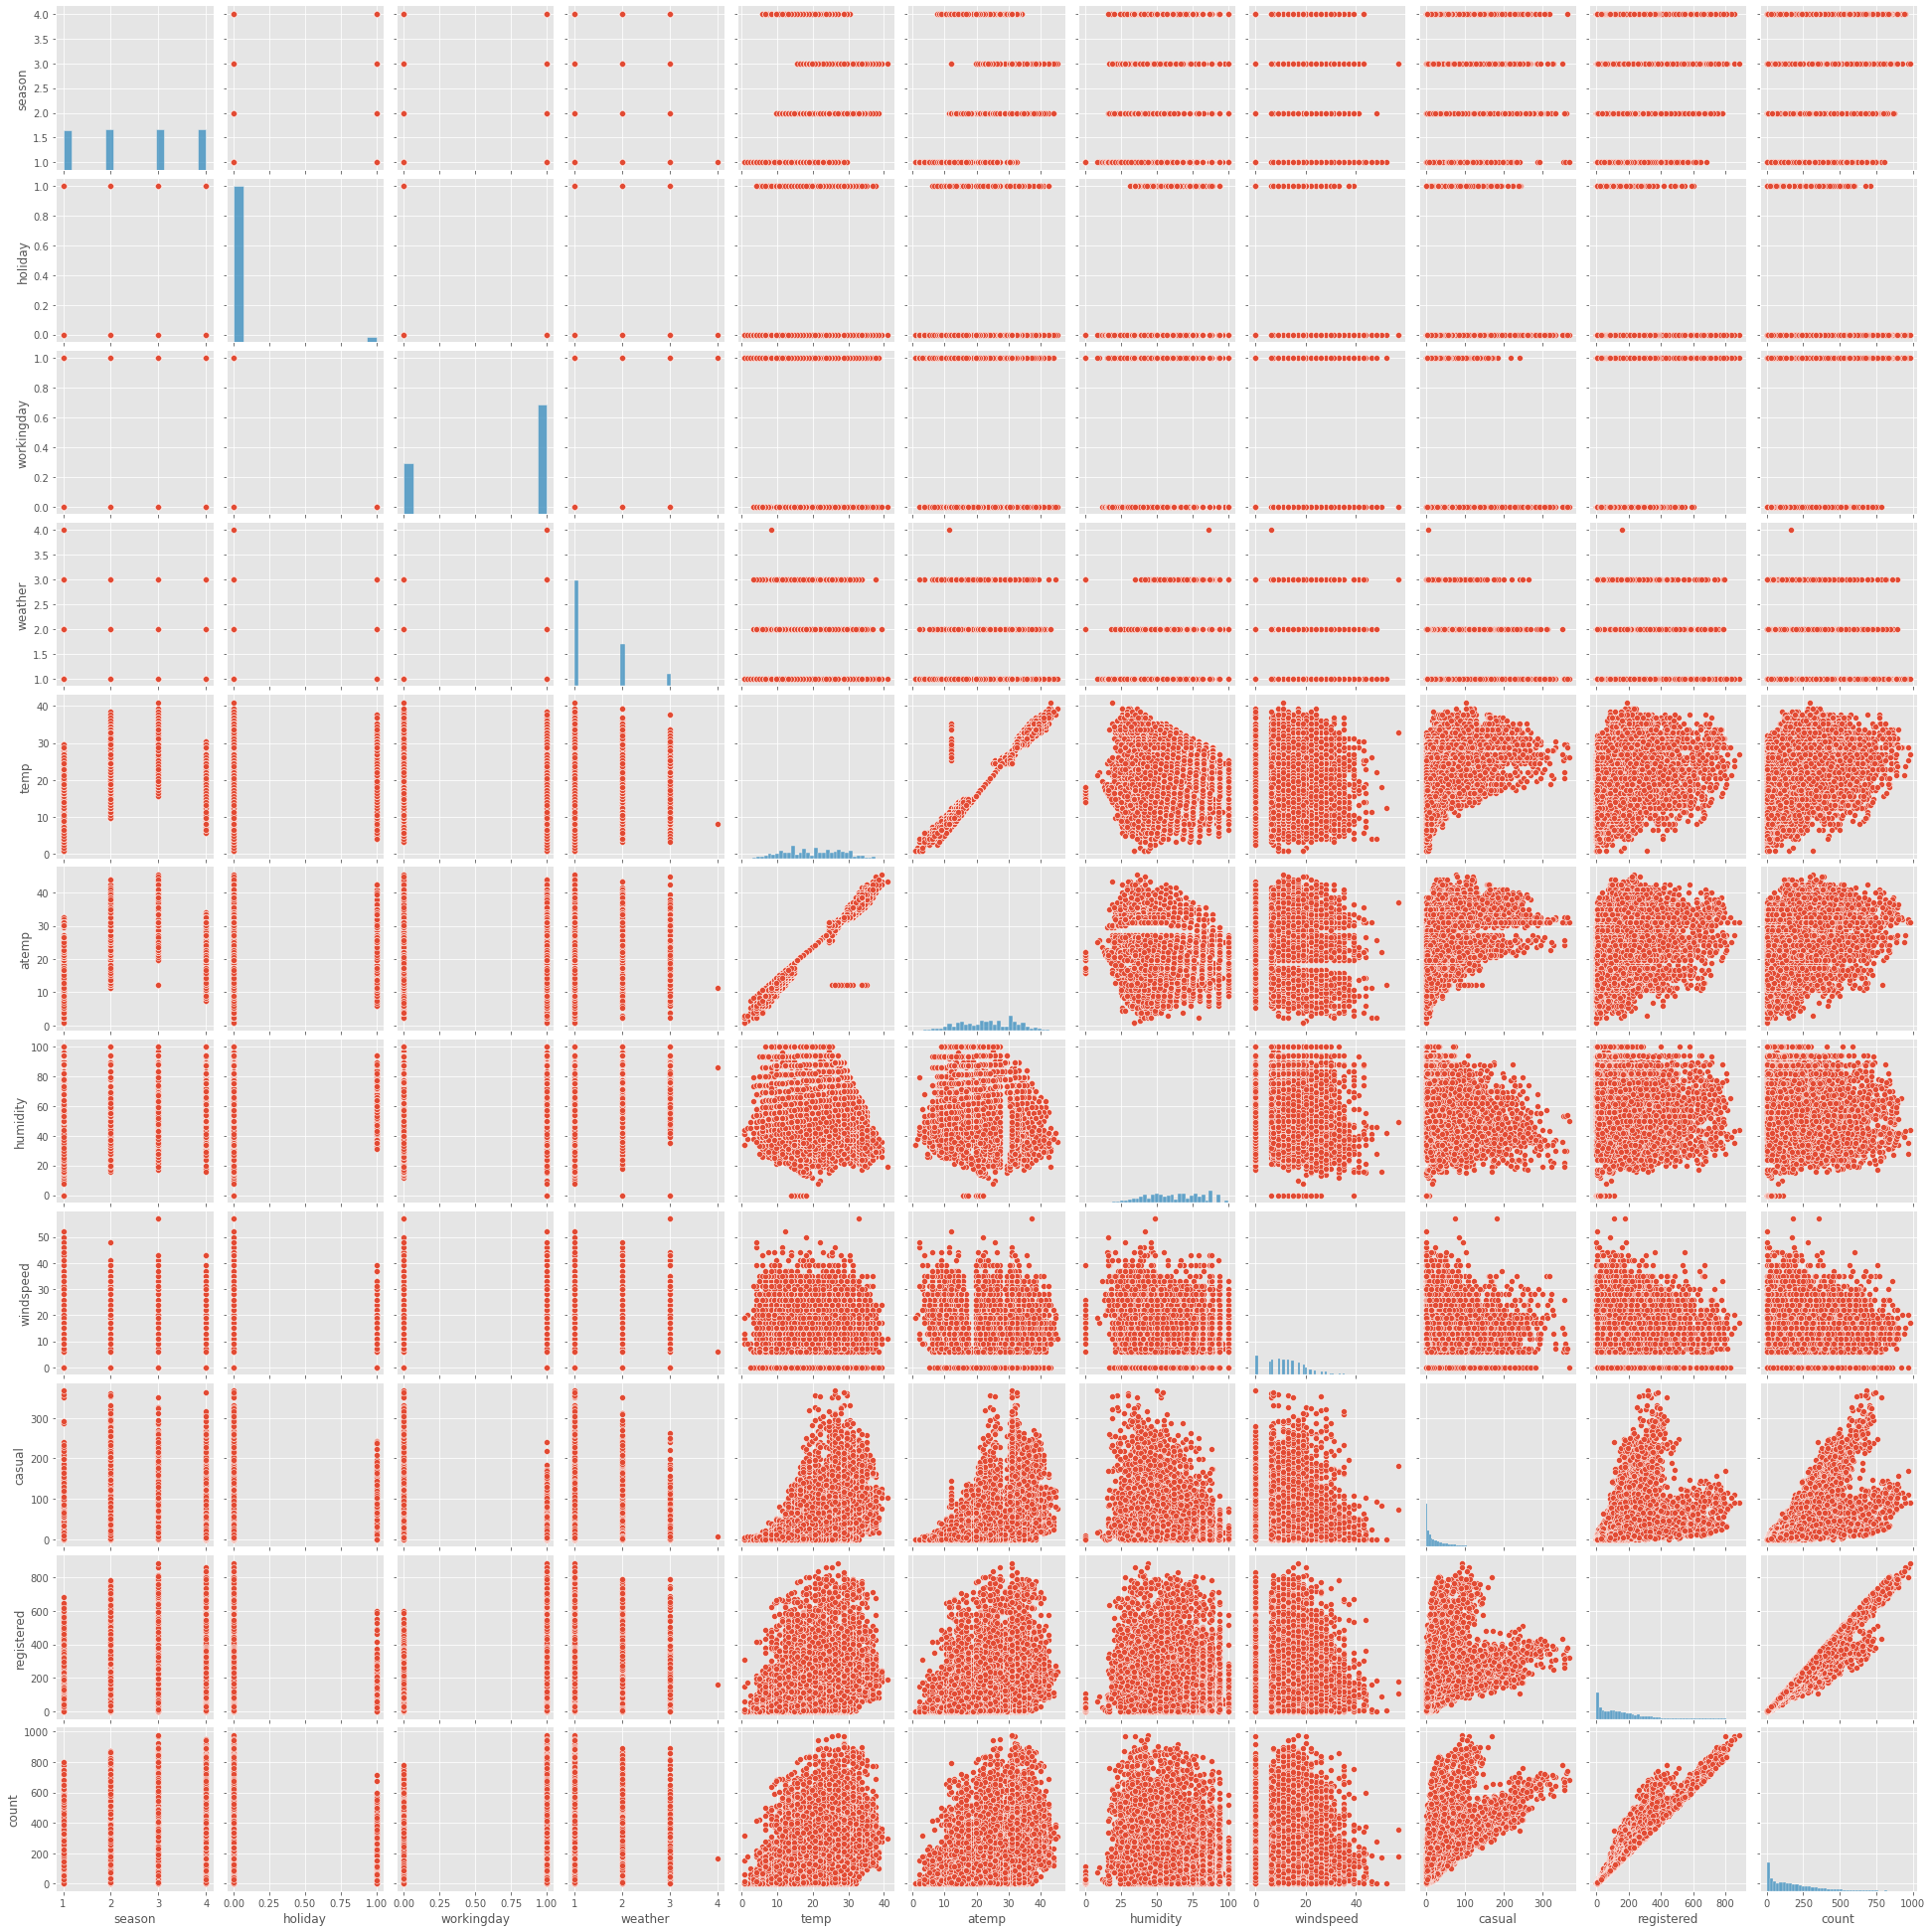

In [222]:
sns.pairplot(train)


## datetime 컬럼을 datetime 자료형으로 변환

In [223]:
train['datetime'] = pd.to_datetime(train['datetime'])
train.head()


datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

In [224]:
date_col = ['year', 'month', 'day', 'hour', 'minute', 'second']

for col_name in date_col :
    
    if col_name == 'year':
        train[col_name] = train['datetime'].dt.year
    elif col_name == 'month':
        train[col_name] = train['datetime'].dt.month
    elif col_name == 'day':
        train[col_name] = train['datetime'].dt.day
    elif col_name == 'hour':
        train[col_name] = train['datetime'].dt.hour
    elif col_name == 'minute':
        train[col_name] = train['datetime'].dt.minute
    elif col_name == 'second':
        train[col_name] = train['datetime'].dt.second
        
# map(lambda) 사용하기 => dt빼고

train.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  year  month  day  hour  \
0        81        0.0       3          13     16  2011      1    1     0   
1        80        0.0       8          32     40  2011      1    1     1   
2        80        0.0       5          27     32  2011      1    1     2   
3        75        0.0       3          10     13  2011      1    1     3   
4        75        0.0       0           1      1  2011      1    1     4   

   minute  second  
0       0       0  
1       0       0  
2       0       0  
3       0       0  
4       0       0

## 데이터 개수 시각화 

- sms.countplt, subplot 활용
- month,. day, hour 는 막대 그래프 상위에 값 출력


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

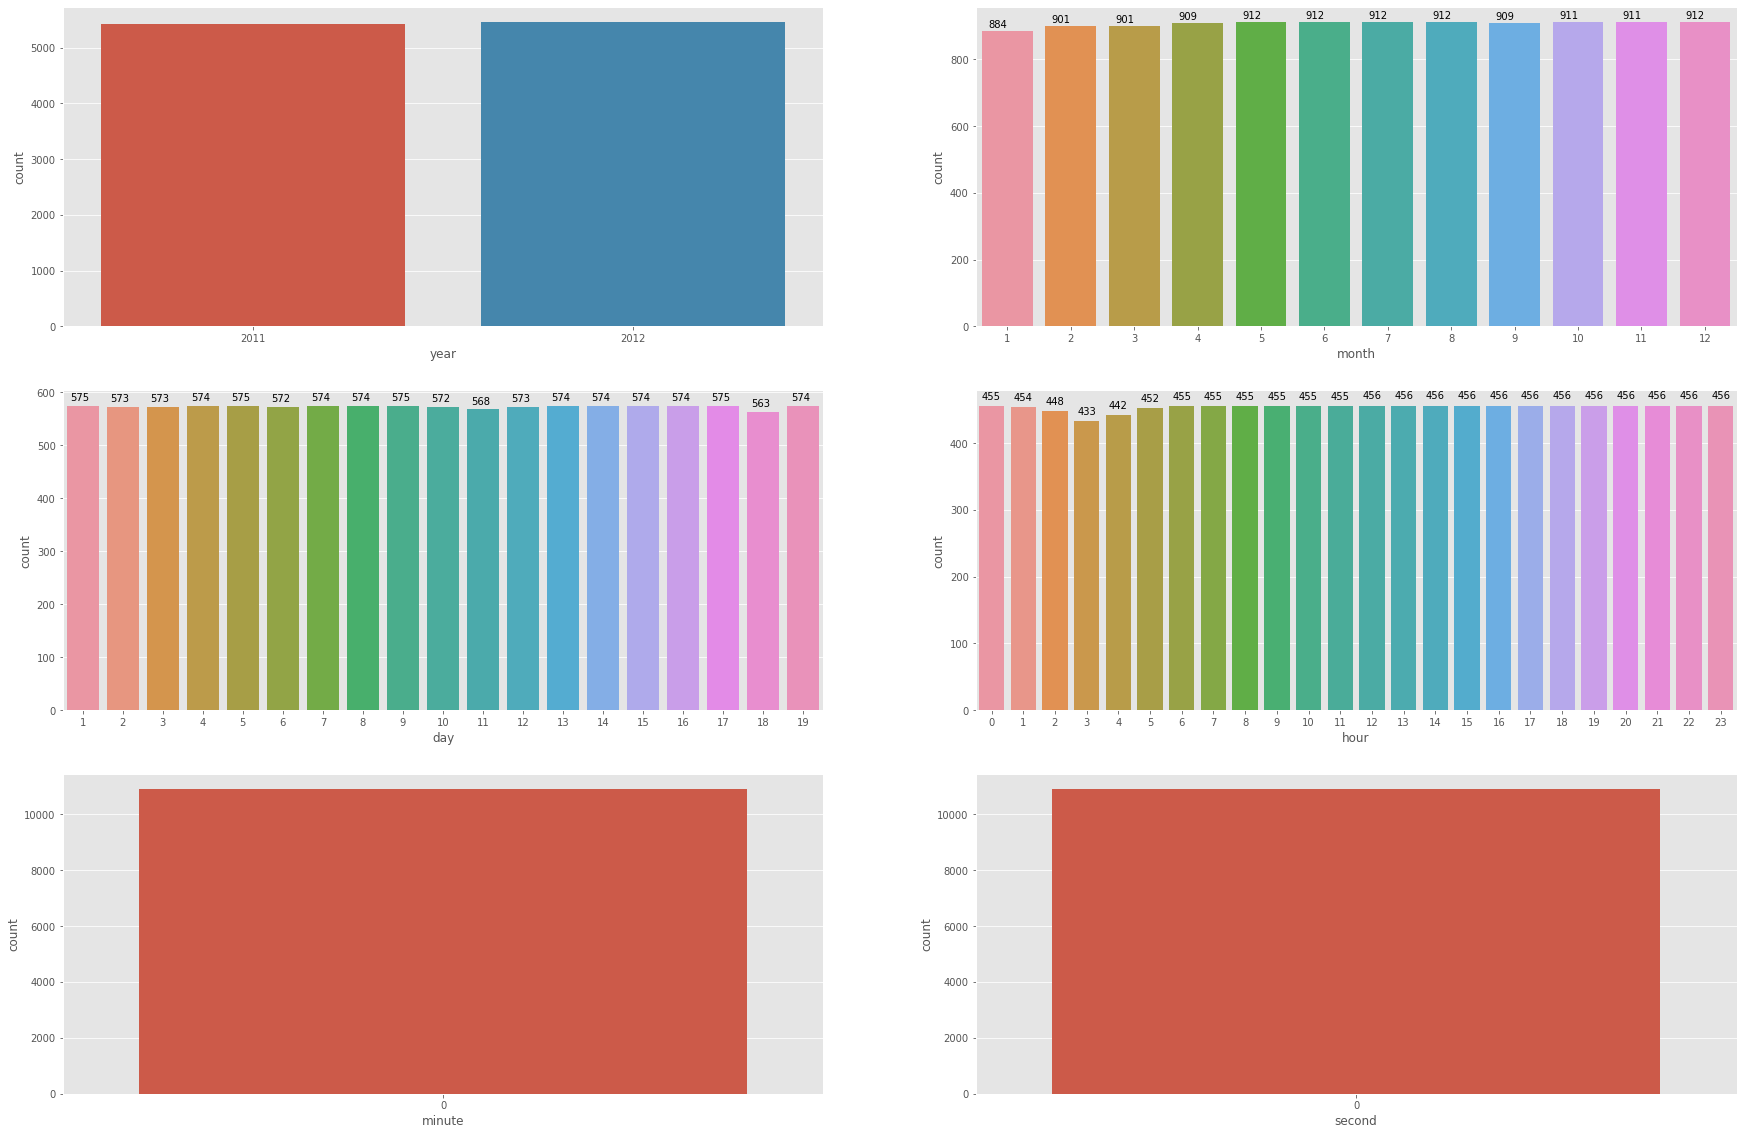

In [225]:
plt.figure(figsize=(30, 20))
for i in range(len(date_col)) :
    plt.subplot(3, 2, i+1)
    ax = sns.countplot(train[date_col[i]])
    
    if i not in  [0, 4, 5]:
        for p in ax.patches:
            ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+10))

## 데이터 분리 
- info() 를 통해 문자열 데이터인지를 확인
- train ['datetime'].dt.weekday 활용, 요일에 대한 정보 추가 
- 학습 데이터 및 RMSE 값:

- 요일, 시간, 날씨 : 167.031365422865

- 요일, 시간, 날씨 + temp : 155.26878251118987

- 요일, 시간, 날씨 + humidity : 163.28265800809078

- 요일, 시간, 날씨 + humidity + temp,atemp + season : 149.625184945586


In [226]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  day         10886 non-null  int64         
 15  hour        10886 non-null  int64         
 16  minute      10886 non-

In [227]:
# 요일 정보
train['datetime'].dt.weekday

0        5
1        5
2        5
3        5
4        5
        ..
10881    2
10882    2
10883    2
10884    2
10885    2
Name: datetime, Length: 10886, dtype: int64

# (3) 학습 및 예측

## model_train 함수 작성 
- train_test_split 을 사용하여 데이터셋 나누기 
- LinearRegression 모델 생성 
- 학습 
- 예측 및 확인 

In [228]:
def model_train(X, y) :
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=94)
    
    model = LinearRegression()
    model.fit(X_train, y_train)

    
    y_pred = model.predict(X_test)
    score = mean_squared_error(y_test, y_pred)
    
    return score, np.sqrt(score)



In [229]:
# 요일 시간 날씨
day = train['datetime'].dt.weekday
X = pd.concat([train['hour'], train['weather'], train['datetime'].dt.weekday], axis=1, ignore_index=False)
y = train['count']

In [230]:
X

hour  weather  datetime
0         0        1         5
1         1        1         5
2         2        1         5
3         3        1         5
4         4        1         5
...     ...      ...       ...
10881    19        1         2
10882    20        1         2
10883    21        1         2
10884    22        1         2
10885    23        1         2

[10886 rows x 3 columns]

In [231]:
mse_score, rmse_score = model_train(X, y)
print("MSE : {:.4f}\nRMSE : {:.4f}".format(mse_score, rmse_score))

MSE : 27899.4770
RMSE : 167.0314


In [232]:
# 요일 시간 날씨 + temp
X = pd.concat([train['hour'], train['weather'], train['datetime'].dt.weekday, train['temp']], axis=1, ignore_index=False)
X

hour  weather  datetime   temp
0         0        1         5   9.84
1         1        1         5   9.02
2         2        1         5   9.02
3         3        1         5   9.84
4         4        1         5   9.84
...     ...      ...       ...    ...
10881    19        1         2  15.58
10882    20        1         2  14.76
10883    21        1         2  13.94
10884    22        1         2  13.94
10885    23        1         2  13.12

[10886 rows x 4 columns]

In [233]:
mse_score, rmse_score = model_train(X, y)
print("MSE : {:.4f}\nRMSE : {:.4f}".format(mse_score, rmse_score))

MSE : 24108.3948
RMSE : 155.2688


In [234]:
# 요일 시간 날씨 + humidity
X = pd.concat([train['hour'], train['weather'], train['datetime'].dt.weekday, train['humidity']], axis=1, ignore_index=False)
X 

hour  weather  datetime  humidity
0         0        1         5        81
1         1        1         5        80
2         2        1         5        80
3         3        1         5        75
4         4        1         5        75
...     ...      ...       ...       ...
10881    19        1         2        50
10882    20        1         2        57
10883    21        1         2        61
10884    22        1         2        61
10885    23        1         2        66

[10886 rows x 4 columns]

In [235]:
mse_score, rmse_score = model_train(X, y)
print("MSE : {:.4f}\nRMSE : {:.4f}".format(mse_score, rmse_score))

MSE : 26661.2264
RMSE : 163.2827


In [236]:
# 요일 시간 날씨 + humidity + temp
X = pd.concat([train['hour'], train['weather'], train['datetime'].dt.weekday, train['humidity'], train['temp']], axis=1, ignore_index=False)
X

hour  weather  datetime  humidity   temp
0         0        1         5        81   9.84
1         1        1         5        80   9.02
2         2        1         5        80   9.02
3         3        1         5        75   9.84
4         4        1         5        75   9.84
...     ...      ...       ...       ...    ...
10881    19        1         2        50  15.58
10882    20        1         2        57  14.76
10883    21        1         2        61  13.94
10884    22        1         2        61  13.94
10885    23        1         2        66  13.12

[10886 rows x 5 columns]

In [237]:
mse_score, rmse_score = model_train(X, y)
print("MSE : {:.4f}\nRMSE : {:.4f}".format(mse_score, rmse_score))

MSE : 22934.6071
RMSE : 151.4418


In [238]:
# 요일 시간 날씨 + humidity + temp, atemp + season
X = pd.concat([train['hour'], train['weather'], train['datetime'].dt.weekday, train['humidity'], train['temp'], train['atemp'], train['season']], axis=1, ignore_index=False)
X

hour  weather  datetime  humidity   temp   atemp  season
0         0        1         5        81   9.84  14.395       1
1         1        1         5        80   9.02  13.635       1
2         2        1         5        80   9.02  13.635       1
3         3        1         5        75   9.84  14.395       1
4         4        1         5        75   9.84  14.395       1
...     ...      ...       ...       ...    ...     ...     ...
10881    19        1         2        50  15.58  19.695       4
10882    20        1         2        57  14.76  17.425       4
10883    21        1         2        61  13.94  15.910       4
10884    22        1         2        61  13.94  17.425       4
10885    23        1         2        66  13.12  16.665       4

[10886 rows x 7 columns]

In [239]:
mse_score, rmse_score = model_train(X, y)
print("MSE : {:.4f}\nRMSE : {:.4f}".format(mse_score, rmse_score))  

MSE : 22387.6960
RMSE : 149.6252


# 예측결과 시각화 

- 결과 중 가장 낮은 예측 결과로 사용 

- x축 : X 데이터 중 temp데이터 / y축 : count
- x축 : X 데이터 중 humidity데이터 / y축 : count

In [243]:
plt.style.use('ggplot')
plt.figure(figsize=(15, 10))
plt.scatter(y_test, X_test['temp'], label="label")
plt.scatter(y_pred, X_test['temp'], label="pred")
plt.legend()

plt.show()

NameError: ignored

<Figure size 1080x720 with 0 Axes>

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(15, 10))
plt.scatter(y_test, X_test['humidity'], label="label")
plt.scatter(y_pred, X_test['humidity'], label="pred")
plt.legend()

plt.show()

# 회고 


## 당뇨병 예측 

- Learning Rate : 0.1
- loss : MSE
- iteration 2851회 부터 loss값은 3000이하로 떨어짐
- test데이터에 대한 성능 : 2870.4427694147507





## 자전거 

### - 학습 데이터 별 RMSE값

- 요일, hour, weather : RMSE = 155.2688

- 요일, hour, weather, tmp : RMSE = 155.2688

- 요일, hour, weather, humidity : RMSE = 163.2827

- 요일, hour, weather, humidity, temp : RMSE = 151.4418

- 요일, hour, weather, humidity, temp, atemp, season : RMSE =  149.6252


- 5번째 학습데이터에 대한 예측 결과 데이터 시각화

-     1. x축 : X 데이터 중 temp데이터 / y축 : count

-     2. x축 : X 데이터 중 humidity데이터 / y축 : count


